<a href="https://colab.research.google.com/github/Tirta2241720045/Machine_Learning/blob/main/Minggu9/Minggu9_2241720045_TirtaNBP_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 9: Perceptron dan ANN
# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# Kelas: TI-3A
# No: 27

# Praktikum 1: Klasifikasi Iris dengan Perceptron
# Langkah 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Kode ini mengimpor pustaka penting untuk analisis dan visualisasi data. **NumPy** digunakan untuk operasi numerik. **Matplotlib.pyplot** membantu membuat grafik. **Pandas** memanipulasi data dalam bentuk tabel. **Seaborn** membuat visualisasi lebih estetis. Saat dijalankan, kode ini tidak menghasilkan output langsung.

# Langkah 2 - Load Data dan Visualisasi

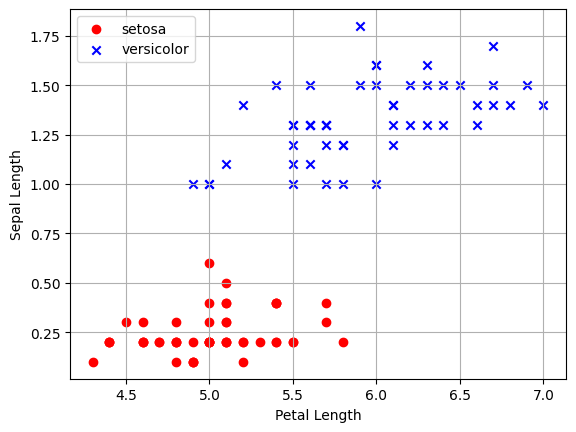

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [42]:
df = pd.read_csv('/content/drive/MyDrive/dataset/iris.csv')
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

a, b = 'SepalLengthCm', 'PetalWidthCm'
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()
print(df.head())

Kode ini memuat dataset Iris dan membuat scatter plot untuk dua spesies bunga. Fungsi `pd.read_csv()` digunakan untuk membaca dataset dari file CSV ke dalam DataFrame. Data untuk spesies Setosa, Versicolor, dan Virginica dipisahkan menggunakan filter DataFrame berdasarkan kolom `Species`. Fungsi `plt.scatter()` digunakan untuk memplot dispersi berdasarkan `SepalLengthCm` dan `PetalWidthCm`, dengan label, legenda, dan grid untuk memperjelas visualisasi. Saat dijalankan, kode ini menampilkan scatter plot dan lima baris pertama dari dataset.

# Langkah 3 - Membuat Kelas Perceptron

In [43]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta  # Learning rate
        self.n_iter = n_iter  # Jumlah iterasi

    def fit(self, X, y):
        # Inisialisasi bobot
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []  # Menyimpan jumlah kesalahan setiap iterasi

        for _ in range(self.n_iter):
            errors = 0  # Reset jumlah kesalahan untuk iterasi ini
            for xi, target in zip(X, y):
                # Hitung pembaruan bobot
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update  # Pembaruan bias
                self.w_[1:] += update * xi  # Pembaruan bobot fitur
                errors += int(update != 0.0)  # Hitung kesalahan
            self.errors_.append(errors)  # Simpan jumlah kesalahan
        return self  # Kembalikan objek untuk chaining

    def net_input(self, X):
        # Hitung input bersih
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # Menghasilkan prediksi kelas
        return np.where(self.net_input(X) >= 0.0, 1, -1)


Kode ini mendefinisikan kelas **Perceptron**, yang merupakan implementasi sederhana dari algoritma pembelajaran mesin untuk klasifikasi. Kelas ini memiliki konstruktor yang menginisialisasi laju pembelajaran (`eta`) dan jumlah iterasi (`n_iter`). Metode **`fit()`** digunakan untuk melatih model dengan data fitur (`X`) dan label target (`y`), yang juga mencakup pembaruan bobot berdasarkan kesalahan prediksi. Fungsi **`net_input()`** menghitung input bersih dari model, sedangkan **`predict()`** menghasilkan prediksi kelas berdasarkan input. Saat dijalankan, objek kelas ini akan dilatih dengan data dan menghasilkan bobot yang diperbarui untuk klasifikasi.

# Langkah 4 - Pilih Data dan Encoding Label

In [47]:
# Memilih 100 data awal dari kolom 'Species'
y = df.iloc[0:100, 5].values  # Indeks 5 untuk kolom 'Species'
y = np.where(y == 'Iris-setosa', -1, 1)  # Ganti label: -1 untuk 'Iris-setosa', 1 untuk 'Iris-versicolor'

# Mengambil fitur dari kolom 'SepalLengthCm' (1) dan 'PetalLengthCm' (2)
X = df.iloc[0:100, [1, 4]].values  # Indeks 1 untuk 'SepalLengthCm' dan indeks 2 untuk 'PetalLengthCm'

Kode ini memilih 100 data pertama dari dataset Iris dan menyiapkan data untuk pelatihan model. Pertama, variabel **`y`** diisi dengan label spesies dari kolom 'Species', di mana 'Iris-setosa' diubah menjadi -1 dan 'Iris-versicolor' menjadi 1. Kemudian, fitur **`X`** diambil dari kolom 'SepalLengthCm' dan 'PetalLengthCm', yang akan digunakan sebagai input untuk model. Data ini mempersiapkan model untuk klasifikasi dengan dua fitur yang relevan. Saat dijalankan, kode ini menghasilkan array `y` untuk label dan `X` untuk fitur dari 100 data awal.

# Langkah 5 - Fitting Model

In [48]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Kode ini membuat objek **Perceptron** dengan laju pembelajaran (`eta`) sebesar 0.1 dan jumlah iterasi (`n_iter`) sebanyak 10. Metode **`fit()`** kemudian dipanggil dengan data fitur **`X`** dan label target **`y`** yang telah disiapkan sebelumnya. Proses ini melatih model Perceptron untuk mengklasifikasikan data, memperbarui bobot berdasarkan kesalahan prediksi selama iterasi. Saat dijalankan, kode ini akan melatih model dan menyimpan bobot serta jumlah kesalahan untuk analisis lebih lanjut.

# Langkah 6 - Visualisasi Nilai Error Per Epoch

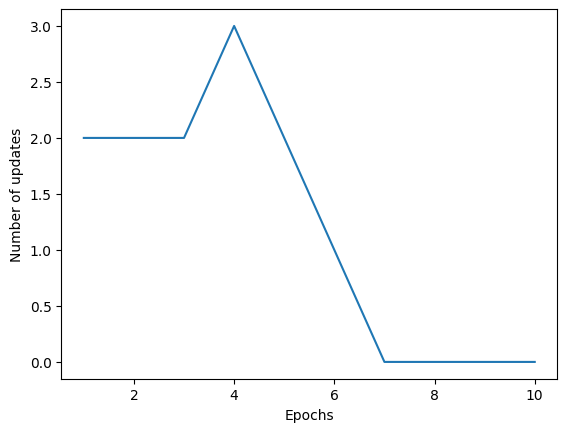

In [49]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Kode ini menghasilkan grafik yang menunjukkan jumlah pembaruan bobot (errors) pada setiap epoch selama pelatihan model Perceptron. Fungsi **`plt.plot()`** digunakan untuk memplot jumlah kesalahan dari setiap epoch, di mana sumbu x menunjukkan epoch dan sumbu y menunjukkan jumlah pembaruan. Label sumbu ditambahkan menggunakan **`plt.xlabel()`** dan **`plt.ylabel()`** untuk memperjelas informasi yang ditampilkan. Saat dijalankan, kode ini menampilkan grafik yang memberikan gambaran tentang kinerja model selama proses pelatihan.

# Langkah 7 - Visualiasasi Decision Boundary

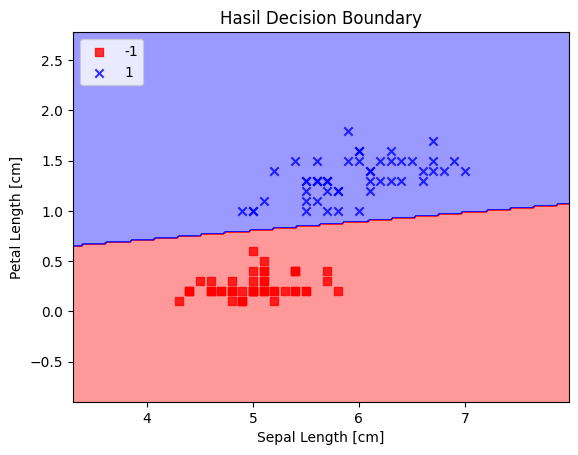

In [59]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # Use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(i), marker=markers[i], label=cl)

# Menampilkan decision boundary
plot_decision_regions(X, y, ppn)
plt.title('Hasil Decision Boundary')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

Kode ini mendefinisikan fungsi **`plot_decision_regions()`** yang digunakan untuk memvisualisasikan batas keputusan model klasifikasi. Fungsi ini menerima data fitur **`X`**, label target **`y`**, dan objek **classifier** (dalam hal ini, model Perceptron). Pertama, kode mengatur marker dan warna untuk setiap kelas, lalu membuat grid dari titik-titik dalam ruang fitur menggunakan fungsi **`meshgrid()`**. Selanjutnya, metode **`predict()`** digunakan untuk memprediksi label kelas dari titik-titik dalam grid tersebut, dan hasilnya diubah menjadi bentuk yang sesuai untuk plot. Kontur batas keputusan digambar dengan **`plt.contourf()`**, diikuti dengan plot titik data berdasarkan kelas mereka. Saat dijalankan, kode ini menampilkan visualisasi batas keputusan model Perceptron terhadap data Iris, menunjukkan bagaimana model membagi ruang fitur.

# Praktikum 2: Klasifikasi Berita dengan Perceptron
# Langkah 1 - Import Library

In [60]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Kode ini mengimpor berbagai pustaka dari **scikit-learn** untuk mempersiapkan dan melatih model Perceptron pada dataset teks. Fungsi **`fetch_20newsgroups`** digunakan untuk mengunduh dataset yang berisi 20 kelompok berita. Sementara itu, **`TfidfVectorizer`** berfungsi untuk mengubah teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). Kelas **`Perceptron`** dari **sklearn.linear_model** digunakan untuk membuat model klasifikasi berbasis Perceptron. Selain itu, fungsi **`f1_score`** dan **`classification_report`** digunakan untuk mengevaluasi kinerja model setelah pelatihan.

# Langkah 2 - Pilih Label dan Split Data

In [61]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Kode ini mengunduh subset dari dataset **20 Newsgroups** yang berfokus pada tiga kategori tertentu: **'rec.sport.hockey'**, **'rec.sport.baseball'**, dan **'rec.autos'**. Fungsi **`fetch_20newsgroups()`** dipanggil dengan parameter `subset` untuk memisahkan data menjadi bagian pelatihan (`train`) dan pengujian (`test`). Selain itu, opsi `remove` digunakan untuk menghapus elemen seperti header, footer, dan kutipan dari setiap dokumen, sehingga hanya teks utama yang digunakan. Data pelatihan disimpan dalam variabel **`newsgroups_train`** dan data pengujian dalam **`newsgroups_test`**. Saat dijalankan, kode ini mempersiapkan dataset yang bersih untuk analisis lebih lanjut menggunakan model klasifikasi.

# Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [62]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

# Praktikum 3: Nilai Logika XOR dengan MLP

# Langkah 1 - Import Library

In [63]:
from sklearn.neural_network import MLPClassifier

Kode ini mengimpor **`MLPClassifier`** dari pustaka **scikit-learn**, yang merupakan implementasi dari Multi-layer Perceptron (MLP) untuk klasifikasi. MLP adalah jenis jaringan saraf tiruan yang dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Kelas ini memungkinkan pengguna untuk menentukan jumlah lapisan tersembunyi dan neuron di setiap lapisan, serta fungsi aktivasi yang digunakan. Setelah objek **`MLPClassifier`** dibuat, model dapat dilatih menggunakan data pelatihan dan kemudian digunakan untuk membuat prediksi pada data baru. Saat dijalankan, kode ini mempersiapkan pustaka yang diperlukan untuk membangun dan melatih model jaringan saraf.

# Langah 2 - Buat Data

In [64]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Kode ini mendefinisikan label dan data untuk dataset sederhana yang dapat digunakan dalam tugas klasifikasi. Variabel **`y`** berisi label biner untuk empat contoh data, di mana `0` dan `1` menunjukkan dua kelas yang berbeda. Variabel **`X`** adalah daftar dari empat pasangan nilai yang mewakili fitur untuk setiap contoh, yang diorganisir dalam bentuk list dua dimensi. Dataset ini sering digunakan untuk menguji algoritma klasifikasi, seperti dalam masalah logika dasar (misalnya, AND, OR, atau XOR). Saat dijalankan, kode ini mempersiapkan data yang dapat langsung digunakan untuk melatih model klasifikasi.

# Langkah 3 - Fit Model

In [65]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Kode ini membuat dan melatih model **MLPClassifier** menggunakan dataset yang telah didefinisikan. Model diinisialisasi dengan beberapa parameter: **`solver='lbfgs'`** untuk algoritma optimisasi, **`activation='logistic'`** untuk fungsi aktivasi, **`hidden_layer_sizes=(2,)`** untuk menentukan satu lapisan tersembunyi dengan dua neuron, dan **`max_iter=100`** untuk membatasi jumlah iterasi pelatihan. Metode **`fit()`** kemudian digunakan untuk melatih model dengan data fitur **`X`** dan label **`y`**. Saat dijalankan, kode ini akan melatih model jaringan saraf untuk memprediksi label berdasarkan fitur yang diberikan.

In [66]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


Kode ini menggunakan model **MLPClassifier** yang telah dilatih untuk membuat prediksi pada dataset yang sama. Metode **`predict()`** dipanggil untuk menghasilkan prediksi dan menyimpannya dalam variabel **`pred`**. Selanjutnya, akurasi model dihitung dengan **`score()`**, yang membandingkan prediksi dengan label sebenarnya, dan hasilnya dicetak ke konsol. Loop `for` digunakan untuk mencetak label asli dan prediksi untuk sepuluh contoh pertama dari dataset. Saat dijalankan, kode ini memberikan informasi tentang akurasi model dan membandingkan hasil prediksi dengan label yang benar.

# Praktikum 4 Klasifikasi dengan ANN
# Pra Pengolahan Data
# Langkah 1 - Import Library

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf

Kode ini mengimpor pustaka penting yang digunakan dalam analisis data dan pengembangan model pembelajaran mesin. **`numpy`** diimpor sebagai **`np`** dan digunakan untuk operasi numerik dan manipulasi array. **`pandas`** diimpor sebagai **`pd`** dan berfungsi untuk manipulasi dan analisis data dalam bentuk DataFrame. **`tensorflow`** diimpor sebagai **`tf`** dan merupakan pustaka utama untuk membangun dan melatih model pembelajaran mendalam. Saat dijalankan, kode ini mempersiapkan pustaka yang diperlukan untuk memanipulasi data dan mengembangkan model pembelajaran mesin atau jaringan saraf.

# Langkah 2 - Load Data

In [68]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Minggu8/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Kode ini memuat dataset dari file CSV menggunakan **`pandas`** dan mempersiapkan data untuk analisis lebih lanjut. Fungsi **`pd.read_csv()`** digunakan untuk membaca file CSV yang terletak di direktori tertentu. Variabel **`X`** diisi dengan semua fitur dari dataset, yang diambil dengan menggunakan metode **`iloc`** untuk memilih kolom dari indeks 3 hingga kolom terakhir yang tidak termasuk label. Variabel **`y`** diisi dengan label target yang berada di kolom terakhir dataset. Saat dijalankan, kode ini mempersiapkan variabel **`X`** dan **`y`** untuk digunakan dalam pelatihan model pembelajaran mesin.

# Cek data (X)

In [69]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Kode ini mencetak nilai dari variabel **`X`**, yang berisi fitur-fitur dari dataset **Churn_Modelling**. Output menunjukkan array dua dimensi yang terdiri dari beberapa baris dan kolom, di mana setiap baris mewakili satu contoh data dan setiap kolom mewakili fitur yang berbeda, seperti umur, negara, jenis kelamin, dan atribut lainnya. Nilai-nilai ini mencakup berbagai jenis data, termasuk numerik dan kategorikal. Saat dijalankan, kode ini memberikan gambaran tentang struktur dan isi dari data fitur yang akan digunakan dalam model pembelajaran mesin.

# Langkah 3 - Encoding Data Kategorikal

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Kode ini menggunakan **`LabelEncoder`** dari pustaka **scikit-learn** untuk mengubah fitur kategorikal menjadi format numerik. Dalam hal ini, kolom ketiga dari variabel **`X`**, yang berisi data jenis kelamin (misalnya, 'Female' dan 'Male'), diubah menjadi bilangan bulat menggunakan metode **`fit_transform()`**. Proses ini mengkodekan setiap kategori sebagai angka unik, yang diperlukan untuk algoritma pembelajaran mesin yang hanya dapat memproses data numerik. Hasilnya adalah array **`X`** yang sekarang memiliki representasi numerik untuk fitur jenis kelamin. Saat dijalankan, kode ini mempersiapkan data fitur agar sesuai untuk pelatihan model pembelajaran mesin.

# Cek data (X)

In [71]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Kode ini mencetak nilai dari variabel **`X`** setelah melakukan proses pengkodean pada kolom jenis kelamin. Output menunjukkan bahwa kolom ketiga, yang sebelumnya berisi kategori 'Female' dan 'Male', sekarang telah diubah menjadi representasi numerik, yaitu `0` untuk 'Female' dan `1` untuk 'Male'. Data lainnya tetap tidak berubah, dan struktur array dua dimensi masih sama, di mana setiap baris mewakili contoh data dan setiap kolom mewakili fitur yang berbeda. Proses ini memungkinkan data untuk digunakan dalam model pembelajaran mesin yang memerlukan format numerik. Saat dijalankan, kode ini memberikan gambaran tentang perubahan yang terjadi pada data fitur setelah pengkodean.

# Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Kode ini menggunakan **`ColumnTransformer`** dan **`OneHotEncoder`** dari pustaka **scikit-learn** untuk mengubah fitur kategorikal yang tersisa menjadi representasi numerik yang lebih sesuai untuk model pembelajaran mesin. Dalam hal ini, kolom kedua (indeks 1), yang berisi negara, diubah menggunakan pengkodean satu panas (one-hot encoding). Metode **`fit_transform()`** diterapkan pada variabel **`X`** untuk menerapkan transformasi dan mengembalikan hasilnya sebagai array numpy baru. Parameter **`remainder='passthrough'`** memastikan bahwa semua kolom lainnya tetap tidak berubah dalam hasil akhir. Saat dijalankan, kode ini menghasilkan dataset yang sepenuhnya numerik, di mana kolom negara kini diwakili oleh beberapa kolom biner, memungkinkan model pembelajaran mesin untuk memproses data dengan lebih efektif.

# Cek data (X) dengan print. Hasilnya,

In [73]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Kode ini mencetak nilai dari variabel **`X`** setelah menerapkan **one-hot encoding** pada kolom negara. Output menunjukkan bahwa kolom negara telah diubah menjadi beberapa kolom biner; setiap kolom mewakili satu negara dan diisi dengan `1.0` jika contoh data tersebut berasal dari negara tersebut, dan `0.0` jika tidak. Struktur array dua dimensi kini terdiri dari lebih banyak kolom, dengan fitur-fitur lainnya tetap berada di akhir array. Proses ini memungkinkan algoritma pembelajaran mesin untuk menangani data kategorikal dengan cara yang lebih efektif, karena model sekarang dapat memahami informasi negara sebagai variabel biner. Saat dijalankan, kode ini memberikan gambaran tentang struktur data yang sudah sepenuhnya siap untuk digunakan dalam pelatihan model pembelajaran mesin.

# Langkah 5 - Split Data

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Kode ini membagi dataset menjadi dua subset: data pelatihan dan data pengujian menggunakan fungsi **`train_test_split`** dari pustaka **scikit-learn**. Variabel **`X`** dan **`y`** dibagi dengan proporsi 80% untuk data pelatihan dan 20% untuk data pengujian, yang ditentukan oleh parameter **`test_size=0.2`**. Parameter **`random_state=0`** digunakan untuk memastikan bahwa pembagian data dapat direproduksi, sehingga hasilnya konsisten setiap kali kode dijalankan. Hasil pembagian disimpan dalam empat variabel: **`X_train`** dan **`y_train`** untuk data pelatihan, serta **`X_test`** dan **`y_test`** untuk data pengujian. Saat dijalankan, kode ini mempersiapkan data untuk pelatihan dan evaluasi model pembelajaran mesin dengan cara yang terstruktur.

# Langkah 6 - Scaling Fitur

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Kode ini menggunakan **`StandardScaler`** dari pustaka **scikit-learn** untuk menstandarisasi fitur dari data pelatihan dan pengujian. Metode **`fit_transform()`** diterapkan pada **`X_train`** untuk menghitung rata-rata dan deviasi standar dari data pelatihan, dan kemudian menerapkan transformasi untuk mengubah data menjadi distribusi dengan rata-rata 0 dan deviasi standar 1. Selanjutnya, metode **`transform()`** digunakan pada **`X_test`** untuk menerapkan skala yang sama yang dihitung dari data pelatihan, memastikan bahwa data pengujian ditransformasikan dengan cara yang sama. Proses ini penting untuk memastikan bahwa model tidak terpengaruh oleh skala fitur yang berbeda. Saat dijalankan, kode ini mempersiapkan data agar sesuai untuk pelatihan model pembelajaran mesin dengan mempertimbangkan standarisasi.

# Membuat Model ANN
# Langkah 1 - Inisiasi Model ANN

In [76]:
ann = tf.keras.models.Sequential()

Kode ini membuat sebuah model jaringan saraf dengan menggunakan **Keras**, yang merupakan API tingkat tinggi untuk membangun dan melatih model pembelajaran mendalam di atas **TensorFlow**. Dengan memanggil **`tf.keras.models.Sequential()`**, sebuah objek model **Sequential** dibuat, yang memungkinkan penambahan lapisan secara berurutan. Model ini cocok untuk arsitektur jaringan saraf sederhana di mana setiap lapisan memiliki satu input dan satu output. Saat dijalankan, kode ini menyiapkan fondasi untuk menambahkan berbagai lapisan ke dalam model jaringan saraf, yang nantinya akan dilatih dengan data yang telah dipersiapkan.

# Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [77]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Kode ini menambahkan lapisan **Dense** ke dalam model jaringan saraf **Sequential** yang telah dibuat sebelumnya. Dengan menggunakan **`tf.keras.layers.Dense(units=6, activation='relu')`**, lapisan ini memiliki 6 neuron dan menggunakan fungsi aktivasi **ReLU** (Rectified Linear Unit). Fungsi aktivasi ReLU membantu model untuk belajar hubungan non-linear dalam data dengan mengizinkan output positif dan mengatur output negatif menjadi nol. Saat dijalankan, kode ini memperluas arsitektur jaringan saraf dengan menambahkan lapisan pertama, yang akan memproses input dari dataset yang telah disiapkan.

# Langkah 3 - Membuat Hidden Layer Kedua

In [78]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Kode ini menambahkan lapisan **Dense** ke dalam model jaringan saraf **Sequential** yang telah dibuat sebelumnya. Dengan menggunakan **`tf.keras.layers.Dense(units=6, activation='relu')`**, lapisan ini memiliki 6 neuron dan menggunakan fungsi aktivasi **ReLU** (Rectified Linear Unit). Fungsi aktivasi ReLU membantu model untuk belajar hubungan non-linear dalam data dengan mengizinkan output positif dan mengatur output negatif menjadi nol. Saat dijalankan, kode ini memperluas arsitektur jaringan saraf dengan menambahkan lapisan pertama, yang akan memproses input dari dataset yang telah disiapkan.

# Langkah 4 - Membuat Output Layer

In [79]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Kode ini menambahkan lapisan **Dense** terakhir ke dalam model jaringan saraf **Sequential** yang telah dibangun. Lapisan ini memiliki 1 neuron dan menggunakan fungsi aktivasi **sigmoid**, yang mengubah output menjadi nilai antara 0 dan 1. Fungsi aktivasi sigmoid sangat cocok untuk masalah klasifikasi biner, di mana model perlu memprediksi dua kelas (misalnya, churn atau tidak churn dalam konteks ini). Saat dijalankan, kode ini menyelesaikan struktur jaringan saraf, yang siap untuk dilatih dengan data pelatihan untuk memprediksi label target.

# Training Model
# Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [80]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Kode ini mengonfigurasi model jaringan saraf yang telah dibangun dengan mengompilasi model menggunakan metode **`compile()`**. Di sini, optimizer yang digunakan adalah **`adam`**, yang merupakan algoritma optimasi yang populer untuk pelatihan jaringan saraf, karena efisien dan bekerja baik dalam banyak kasus. Fungsi kerugian yang dipilih adalah **`binary_crossentropy`**, yang sesuai untuk masalah klasifikasi biner, membantu model untuk meminimalkan kesalahan prediksi. Selain itu, **`metrics=['accuracy']`** menunjukkan bahwa selama pelatihan dan evaluasi, akurasi model akan dilacak sebagai metrik kinerja. Saat dijalankan, kode ini menyiapkan model untuk pelatihan dengan mengatur parameter penting yang diperlukan untuk proses optimasi.

# Langkah 2 - Fitting Model

In [81]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7911 - loss: 0.5544
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.4825
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.4459
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4294
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4337
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.4279
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8136 - loss: 0.4243
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8211 - loss: 0.4203
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.4114
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.4048
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.4138
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Kode ini melatih model jaringan saraf yang telah dibangun menggunakan metode **`fit()`**. Dalam hal ini, **`X_train`** dan **`y_train`** adalah data fitur dan label target yang digunakan untuk melatih model. Parameter **`batch_size=32`** menunjukkan bahwa pembaruan bobot akan dilakukan setiap 32 sampel, yang dapat membantu dalam stabilitas dan kecepatan pelatihan. Selain itu, **`epochs=100`** berarti model akan dilatih selama 100 iterasi penuh melalui seluruh dataset pelatihan. Saat dijalankan, kode ini memulai proses pelatihan, memungkinkan model untuk belajar dari data dan meningkatkan kemampuannya dalam memprediksi hasil yang benar.

# Membuat Prediksi
Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes

- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

Berdasarkan hasil prediksi, model mengeluarkan nilai **`[[False]]`** untuk pelanggan tersebut. Ini menunjukkan bahwa pelanggan tersebut **tidak perlu dipertahankan** karena model memprediksi bahwa pelanggan ini **tidak akan mengalami churn**.

Lebih lanjut, dengan melihat hasil dari matriks kebingungan dan akurasi model:
- Matriks kebingungan **`[[1502, 93], [183, 222]]`** menunjukkan bahwa model cukup baik dalam membedakan antara pelanggan yang akan churn dan tidak.
- Akurasi model sebesar **0.862** (86.2%) menunjukkan bahwa model secara umum memberikan prediksi yang akurat.

Dengan demikian, berdasarkan informasi yang diberikan dan hasil prediksi dari model, pelanggan ini tidak dianggap perlu dipertahankan.

# Modelkan Data Baru dan Buat Prediksi

In [82]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[False]]


Kode ini menggunakan model jaringan saraf yang telah dilatih untuk melakukan prediksi pada data baru. Dengan memanggil **`ann.predict()`**, model memberikan prediksi untuk input yang telah distandarisasi menggunakan **`sc.transform()`**. Input yang diberikan dalam bentuk array mencakup berbagai fitur yang relevan, seperti status, usia, saldo, dan lain-lain. Hasil prediksi adalah nilai probabilitas, dan kode ini memeriksa apakah nilai tersebut lebih besar dari 0.5 untuk menentukan kelasnya; jika lebih besar, hasilnya akan **True** (memprediksi kelas 1), dan jika kurang atau sama, hasilnya akan **False** (memprediksi kelas 0). Dalam output, **`[[False]]`** menunjukkan bahwa model memprediksi bahwa input tersebut tidak termasuk dalam kelas positif (dalam konteks ini, kemungkinan besar berarti tidak akan mengalami churn). Saat dijalankan, kode ini memberikan hasil prediksi dari model berdasarkan data yang baru.

Apakah hasilnya False?
Jawab: Iya False

# Prediksi Dengan Data Testing

In [83]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Kode ini melakukan prediksi terhadap data pengujian **`X_test`** menggunakan model jaringan saraf yang telah dilatih, dengan hasil prediksi disimpan dalam **`y_pred`**. Nilai probabilitas hasil prediksi dibandingkan dengan ambang batas 0.5; jika lebih besar, nilai prediksi diubah menjadi **True** (atau 1), dan jika tidak, menjadi **False** (atau 0). Selanjutnya, kode ini menggabungkan hasil prediksi dengan label sebenarnya dari data pengujian **`y_test`** menggunakan **`np.concatenate()`**, yang membuat array dua kolom; kolom pertama berisi prediksi dan kolom kedua berisi nilai aktual. Output menunjukkan hasil prediksi dan label asli, di mana **`[[0 0], [0 1], ...]`** menggambarkan setiap baris sebagai [prediksi, label aktual]. Saat dijalankan, kode ini memberikan gambaran tentang kinerja model pada data pengujian dengan memperlihatkan hasil prediksi dibandingkan dengan label yang sebenarnya.

# Cek Akurasi dan Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1502   93]
 [ 183  222]]


0.862

Kode ini menghitung dan menampilkan matriks kebingungan (confusion matrix) serta akurasi model pada data pengujian **`X_test`**. Dengan menggunakan **`confusion_matrix()`**, matriks kebingungan yang dihasilkan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas; dalam hal ini, output **`[[1502, 93], [183, 222]]`** berarti model benar memprediksi 1502 kasus kelas negatif dan 222 kasus kelas positif, tetapi salah memprediksi 93 kasus positif sebagai negatif dan 183 kasus negatif sebagai positif. Selanjutnya, **`accuracy_score()`** digunakan untuk menghitung akurasi model, yang dalam kasus ini adalah **0.862** atau 86.2%, menunjukkan persentase prediksi yang benar dari total prediksi. Saat dijalankan, kode ini memberikan wawasan tentang kinerja model dengan menunjukkan baik matriks kebingungan maupun nilai akurasi.